# INF 552 HW1 - Chao Chen

## Question 1

In [1]:
import sys
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, f1_score
%matplotlib inline

### (a)

In [2]:
names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv('data_banknote_authentication.txt', header=None, names=names)

### (b) (i)

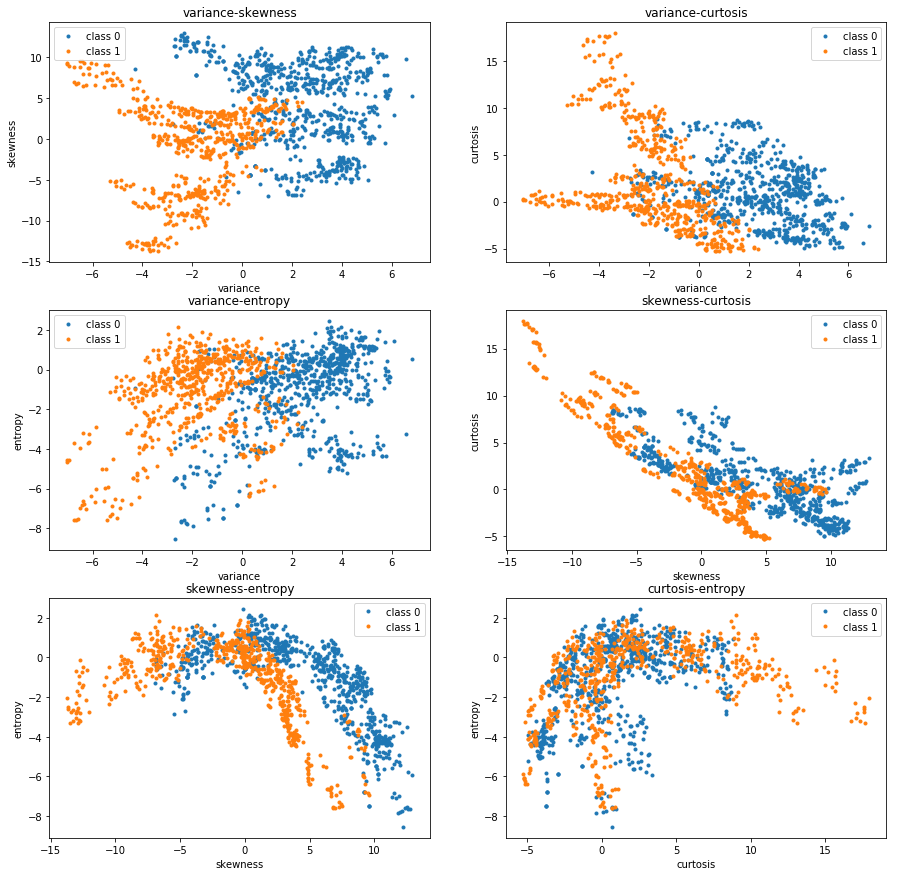

In [3]:
classes = df['class']
var_names = ['variance', 'skewness', 'curtosis', 'entropy']

index = 1
f, axs = plt.subplots(3,2,figsize=(15,15))
for i in range(len(var_names)):
    for j in range(i+1, len(var_names)):
        plt.subplot(3, 2, index)
        var1 = var_names[i]
        var2 = var_names[j]
        plt.title(var1 + "-" + var2)
        class0, = plt.plot(df[classes == 0][var1], df[classes == 0][var2], label='class 0', marker='.', linestyle='')
        class1, = plt.plot(df[classes == 1][var1], df[classes == 1][var2], label='class 1', marker='.', linestyle='')

        plt.legend([class0, class1], ['class 0', 'class 1'])
        plt.xlabel(var1)
        plt.ylabel(var2)
        index += 1


### (b) (ii)

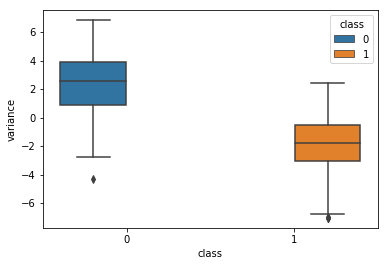

In [4]:
sns.boxplot(x="class", y="variance", hue="class", data=df)

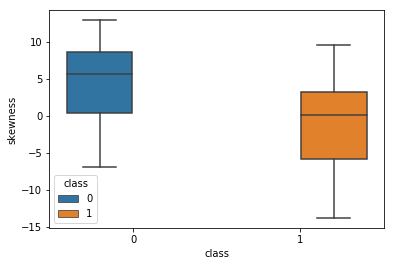

In [5]:
sns.boxplot(x="class", y="skewness", hue="class", data=df)

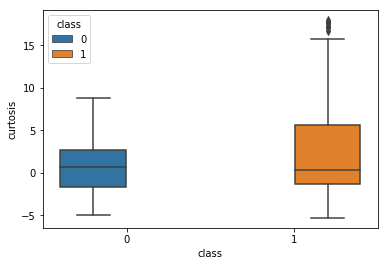

In [6]:
sns.boxplot(x="class", y="curtosis", hue="class", data=df)

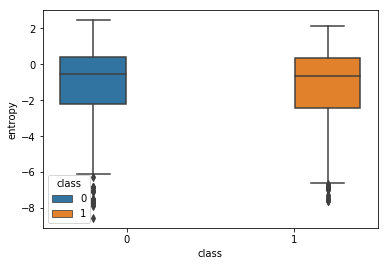

In [7]:
sns.boxplot(x="class", y="entropy", hue="class", data=df)

### (b) (iii)

In [8]:
test_set = df[classes==0][:200].append(df[classes==1][:200])
training_set = df[classes==0][200:].append(df[classes==1][200:])

### (c) (i)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

# KNN with Euclidean metric
knn = KNeighborsClassifier()

### (c) (ii)

In [10]:
def findBestK(k_list, metric='minkowski', p=2, metric_params=None, weights='uniform'):
    training_list = []
    test_list = []
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p, metric_params=metric_params, weights=weights)
        knn.fit(training_set[var_names], training_set['class'])

        pred_train = knn.predict(training_set[var_names])
        pred_test = knn.predict(test_set[var_names])

        training_error = 1 - accuracy_score(training_set['class'], pred_train)
        test_error = 1 - accuracy_score(test_set['class'], pred_test)
        
        training_list.append(training_error)
        test_list.append(test_error)
    return training_list, test_list

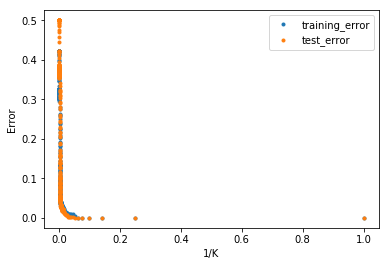

In [11]:
k_list = np.arange(1,904,3)
training_list, test_list = findBestK(k_list)
x_values = [1/x for x in k_list]
plt.plot(x_values, training_list, label = 'training_error', marker='.', linestyle='')
plt.plot(x_values, test_list, label = 'test_error', marker='.', linestyle='')
plt.legend()
plt.xlabel('1/K')
plt.ylabel('Error')
plt.show()

In [12]:
def calculateResults(knn, k_value):
    print('k value: ' + str(k_value))
    pred_test = knn.predict(test_set[var_names])
    confusion_matrix_result = confusion_matrix(test_set['class'], pred_test)
    print("confusion matrix: ")
    print(confusion_matrix_result)
    true_pos_rate = confusion_matrix_result[1][1]/200
    print('true positive rate: ' + str(true_pos_rate))
    true_negative_rate = confusion_matrix_result[0][0]/200
    print('true negative rate: ' + str(true_negative_rate))
    precision = precision_score(test_set['class'], pred_test)
    print('precision: ' + str(precision))
    f_score = f1_score(test_set['class'], pred_test)
    print('F score: ' +  str(f_score))

In [13]:
test_list = np.array(test_list)
training_list = np.array(training_list)
min_error = np.min(test_list)
min_args = np.where(test_list == min_error)[0]
print(k_list[min_args])

best_k = max(k_list[min_args])

knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=2, metric_params=None)
knn.fit(training_set[var_names], training_set['class'])
calculateResults(knn, best_k)

[ 1  4  7 10 13 16 19]
k value: 19
confusion matrix: 
[[200   0]
 [  0 200]]
true positive rate: 1.0
true negative rate: 1.0
precision: 1.0
F score: 1.0


**Answer to (c)(ii):** 

The best values of k* is 19. Among all k values such that test error is zero, we choose the largest k so that the variance would not be too high.

For k* = 19, the confusion matrix, TP rate, TN rate, precision and F-score are shown above.

### (c) (iii)

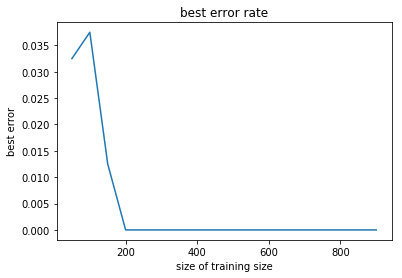

In [14]:
N = np.arange(50,950,50)
best_errors = []
for n in N:
    training = df[classes==0][200:][:n//2].append(df[classes==1][200:][:n//2])
    best_error = 2
    best_k = None
    for k in range(1, min(n, len(training)), 40):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(training[var_names], training['class'])
        pred_test = knn.predict(test_set[var_names])
        error = 1 - accuracy_score(test_set['class'], pred_test)
        if error < best_error:
            best_k = k
            best_error = error
    best_errors.append(best_error)
    
plt.plot(N, best_errors)
plt.xlabel('size of training size')
plt.ylabel('best error')
plt.title('best error rate')
plt.show()

### (d) (i) Minkowski Distance

**A. which becomes Manhattan Distance with p = 1.**

In [15]:
k_list_d = np.arange(1,911,10)
training_list_A, test_list_A = findBestK(k_list_d, p=1)
test_list_A = np.array(test_list_A)
min_error_A = np.min(test_list_A)
min_args_A = np.where(test_list_A == min_error_A)[0]
best_k_A = max(k_list_d[min_args_A])
print("The best K is: " + str(best_k_A))

The best K is: 11


**B. $log_{10}$(p) ∈ {0.1,0.2,0.3,...,1}.**

In [ ]:
log_p_rng = np.arange(1, 11, 1)/10
p_rng = np.power(10, log_p_rng)
test_error_list = []
for p in p_rng:
    knn = KNeighborsClassifier(n_neighbors=best_k_A, p=p)
    knn.fit(training_set[var_names], training_set['class'])
    pred_test = knn.predict(test_set[var_names])
    test_error = 1 - accuracy_score(test_set['class'], pred_test)
    test_error_list.append(test_error)
print(test_error_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


**Answer:** Since all test errors are zero, all p values are equivalently the best.

**C. Chebyshev Distance with p → ∞**

In [17]:
training_list_C, test_list_C = findBestK(k_list_d, metric='chebyshev')
test_list_C = np.array(test_list_C)
min_error_C = np.min(test_list_C)
min_args_C = np.where(test_list_C == min_error_C)[0]
best_k_C = max(k_list_d[min_args_C])
print("The best K is: " + str(best_k_C))

The best K is: 11


### (d) (ii) Mahalanobis Distance

In [18]:
training_list_D, test_list_D = findBestK(k_list_d, metric='mahalanobis', metric_params={'V': np.cov(training_set[var_names].T)})
test_list_D = np.array(test_list_D)
min_error_D = np.min(test_list_D)
min_args_D = np.where(test_list_D == min_error_D)[0]
best_k_D = max(k_list_d[min_args_D])
print("The best K is: " + str(best_k_D))

The best K is: 11


In [19]:
print(min_error_A, min_error_C, min_error_D)

0.0 0.0 0.0


**Summary of (d):**

  | Manhattan | $log_{10}(p)$ | Chebyshev  | Mahalanobis | 
 ----- | --------- | ---------- | ----- | ----- | ----- |
   Best K    |   11    |   11    |  11     |   11    |  
 Test  Error | 0 | 0 | 0 | 0 |

### (e)

**Euclidean**

In [20]:
k_list_d = np.arange(1,911,10)
training_list_1, test_list_1 = findBestK(k_list_d, weights='distance')
test_list_1 = np.array(test_list_1)
min_error_1 = np.min(test_list_1)
min_args_1 = np.where(test_list_1 == min_error_1)[0]
best_k_1 = max(k_list_d[min_args_1])
print("The best K is: " + str(best_k_1))
print("The best test error is: " + str(min_error_1))

The best K is: 51
The best test error is: 0.0


For Euclidean distance, the best K is 51 and the best test error is 0.

**Manhattan**

In [21]:
training_list_2, test_list_2 = findBestK(k_list_d, p=1, weights='distance')
test_list_2 = np.array(test_list_2)
min_error_2 = np.min(test_list_2)
min_args_2 = np.where(test_list_2 == min_error_1)[0]
best_k_2 = max(k_list_d[min_args_2])
print("The best K is: " + str(best_k_2))
print("The best test error is: " + str(min_error_2))

The best K is: 81
The best test error is: 0.0


For Manhattan distance, the best K is 81 and the best test error is 0.

**Chebyshev**

In [22]:
training_list_3,  test_list_3 = findBestK(k_list_d, metric='chebyshev', weights='distance')
test_list_3 = np.array(test_list_3)
min_error_3 = np.min(test_list_3)
min_args_3 = np.where(test_list_3 == min_error_3)[0]
best_k_3 = max(k_list_d[min_args_3])
print("The best K is: " + str(best_k_3))
print("The best test error is: " + str(min_error_3))

The best K is: 481
The best test error is: 0.0


For Chebyshev distance, the best K is 481 and the best test error is 0.

### (f)

In [23]:
min(training_list)

0.0

The lowest training errror rate in this exercise is 0.

## Question 2

### (a) Download data

### (b) (i)

In [ ]:
df2 = pd.read_excel('Folds5x2_pp.xlsx', sheet="sheet1")

In [25]:
print("Number of rows: " + str(len(df2)))
print("Number of columns: " + str(len(df2.columns)))

Number of rows: 9568
Number of columns: 5


There are 9568 rows and 5 columns.

Each row represents the ambient variables data per second collected from a Combined Cycle Power Plant.

The columns represent features consist of hourly average ambient variables, including Temperaure, Ambient Pressure, Relative Humidty , Exhaust Vacuum and Energy Output.

### (b) (ii)

In [26]:
print(df2.columns[2])

AP


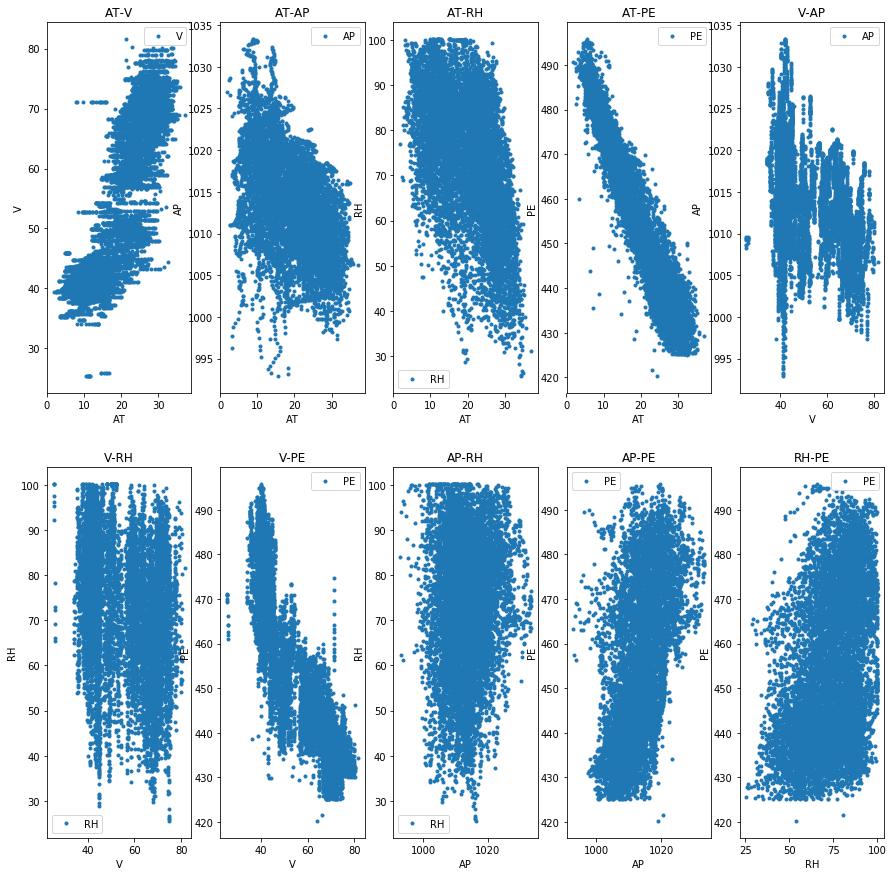

In [27]:
index = 1
f, axs = plt.subplots(2,5,figsize=(15,15))
names = df2.columns
for i in range(len(names)):
    for j in range(i+1, len(names)):
        plt.subplot(2, 5, index)
        var1 = names[i]
        var2 = names[j]
        plt.title(var1 + "-" + var2)
        class0, = plt.plot(df2[var1], df2[var2], marker='.', linestyle='')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.legend()
        index += 1

**Obervations:**
1. From the plot of 'AT' versus 'V', we see they have high collinearity. The higher the temperature is, the higher the exhaust vacuum is.

2. From the plot of 'AT' versus 'PE', we see they have very high collinerity. The higher the temperature is, the lower the electrical energy output is.

3. There might be collinearity between 'V' and 'PE', which is between exhaust vacuum and electrical energy output.

4. We don't see obvious collinearity in other plots.

### (b) (iii)

In [28]:
df2.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### (c)


In [29]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#### Linear regression PE~AT

In [30]:
x_AT = sm.add_constant(df2['AT'])
results_AT = sm.OLS(df2['PE'], x_AT).fit()
print(results_AT.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:14   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

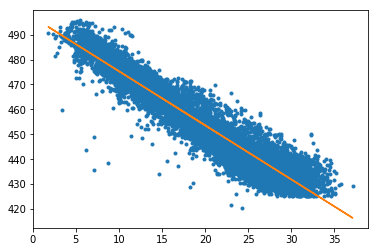

In [31]:
const, slope = results_AT.params
abline_values = []
plt.plot(df2['AT'], df2['PE'], marker='.', linestyle='')
plt.plot(df2['AT'], const + df2['AT']*slope)

{'boxes': [<matplotlib.lines.Line2D at 0x115350780>],
 'caps': [<matplotlib.lines.Line2D at 0x1153311d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x115331e48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115331a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1153508d0>,
  <matplotlib.lines.Line2D at 0x115350d68>]}

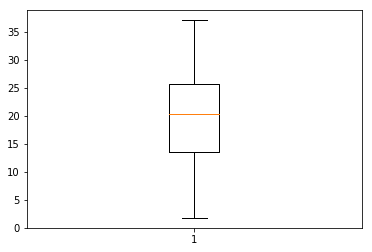

In [32]:
plt.boxplot(df2['AT'])

#### Linear regression PE~V

In [33]:
x_V = sm.add_constant(df2['V'])
results_V = sm.OLS(df2['PE'], x_V).fit()
print(results_V.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:14   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

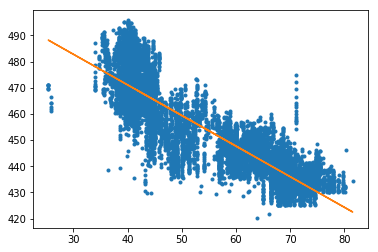

In [34]:
const, slope = results_V.params
abline_values = []
plt.plot(df2['V'], df2['PE'], marker='.', linestyle='')
plt.plot(df2['V'], const + df2['V']*slope)

{'boxes': [<matplotlib.lines.Line2D at 0x114db2f60>],
 'caps': [<matplotlib.lines.Line2D at 0x114dc09b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x114da4668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114da4240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114dc00f0>,
  <matplotlib.lines.Line2D at 0x114dc0588>]}

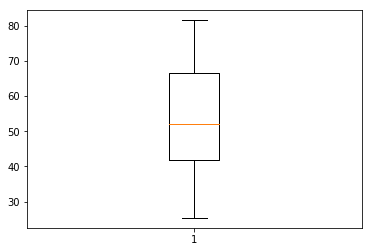

In [35]:
plt.boxplot(df2['V'])

#### Linear regression PE~AP

In [36]:
x_AP = sm.add_constant(df2['AP'])
results_AP = sm.OLS(df2['PE'], x_AP).fit()
print(results_AP.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:14   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

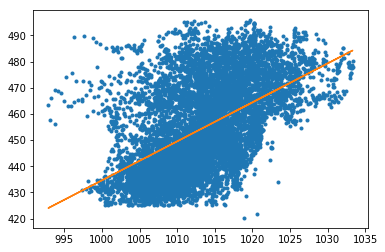

In [37]:
const, slope = results_AP.params
abline_values = []
plt.plot(df2['AP'], df2['PE'], marker='.', linestyle='')
plt.plot(df2['AP'], const + df2['AP']*slope)

{'boxes': [<matplotlib.lines.Line2D at 0x113f1df60>],
 'caps': [<matplotlib.lines.Line2D at 0x113f289b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x113f2e668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113f2e240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x113f280f0>,
  <matplotlib.lines.Line2D at 0x113f28588>]}

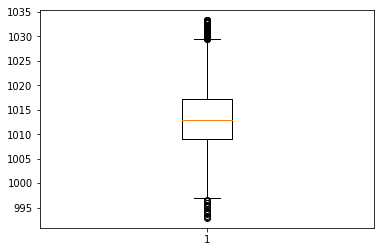

In [38]:
plt.boxplot(df2['AP'])

#### Linear regression PE~RH

In [39]:
x_RH = sm.add_constant(df2['RH'])
results_RH = sm.OLS(df2['PE'],x_RH).fit()
print(results_RH.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:15   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

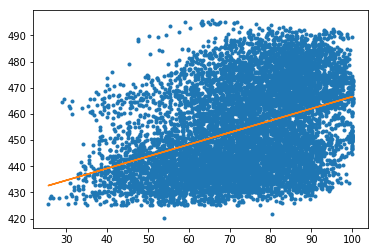

In [40]:
const, slope = results_RH.params
abline_values = []
plt.plot(df2['RH'], df2['PE'], marker='.', linestyle='')
plt.plot(df2['RH'], const + df2['RH']*slope)

{'boxes': [<matplotlib.lines.Line2D at 0x1180daef0>],
 'caps': [<matplotlib.lines.Line2D at 0x1180e3940>,
 'fliers': [<matplotlib.lines.Line2D at 0x1181375f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1181371d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1180e3080>,
  <matplotlib.lines.Line2D at 0x1180e3518>]}

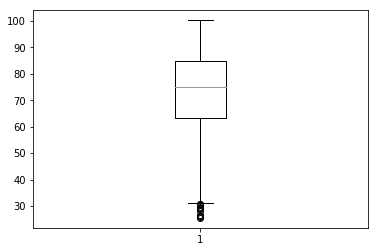

In [41]:
plt.boxplot(df2['RH'])

**Answer to (c):**

All models show that there is a statistically significant association between the predictor and the response. Because we see that each F test statistic is in the rejection region (p-value < 0.05), it means every model is statistically significant.

Outliers: From the box plot of four predictors, we can see that there are outliers in 'AP' variable and 'RH' variable.


### (d)

In [42]:
x_all = sm.add_constant(df2[['AT','V','AP','RH']])
results_all = sm.OLS(df2['PE'], x_all).fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:15   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

**Answer:** Because we see that F test statistic is in the rejection region (p-value < 0.05), it means this model is statistically significant. Because the p-values of all four variables are less than 0.05, we can reject the null hypothesis for all predictors.

### (e)

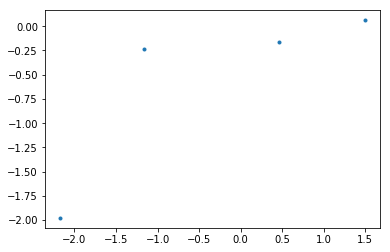

In [43]:
x_values = np.array([results_AT.params[1], results_V.params[1], results_AP.params[1], results_RH.params[1]])
y_values = np.array(results_all.params[1:])
plt.plot(x_values, y_values, marker='.', linestyle='')

From the above plot, we see that there is an approximate linear relationship between the univariate regression coefficients and the multiple regression coefficients. The larger the coefficient is in univarite regression, the larger it is in multiple regression.

### (f)

#### Nonlinear for AT

In [44]:
px_AT = sm.add_constant(np.array([df2['AT'], df2['AT']**2, df2['AT']**3]).T)
poly_AT = sm.OLS(df2['PE'], px_AT).fit()
print(poly_AT.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:15   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

#### Nonlinear for V

In [45]:
px_V = sm.add_constant(np.array([df2['V'], df2['V']**2, df2['V']**3]).T)
poly_V = sm.OLS(df2['PE'], px_V).fit()
print(poly_V.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:15   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

#### Nonlinear for AP

In [46]:
px_AP = sm.add_constant(np.array([df2['AP'], df2['AP']**2, df2['AP']**3]).T)
poly_AP = sm.OLS(df2['PE'], px_AP).fit()
print(poly_AP.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:15   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

#### Nonlinear for RH

In [47]:
px_RH = sm.add_constant(np.array([df2['RH'], df2['RH']**2, df2['RH']**3]).T)
poly_RH = sm.OLS(df2['PE'], px_RH).fit()
print(poly_RH.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:15   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

**Answer to (f):** Yes. For 'AT', 'AP' and 'RH', all polynomial terms are statistically significant. For 'V', the square term is not significant since its p-value is larger than 0.05. But the cubic term of 'V' is significant, so there is evidence of nonlinear association. Hence, all predictors have nonlinear association with the response.

### (g)

In [48]:
import statsmodels.formula.api as smf

In [49]:
inter_fit = smf.ols(formula='PE~ AT*AP + AT*RH + AT*V + AP*RH + AP*V + RH*V', data=df2).fit()
print(inter_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:15   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

**Answer to (g):** The interaction terms 'AT:RH', 'AT:V', 'AP:RH', 'AP:V' are statistically significant, because their p-values are smaller than 0.05.

### (h)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(df2, test_size=0.3)

model1 = smf.ols(formula='PE~ AT + AP + RH + V', data=train).fit()
pred_train_1 = model1.predict(train[['AT', 'AP', 'RH', 'V']]) 
pred_test_1 = model1.predict(test[['AT', 'AP', 'RH', 'V']])

train_error1 = metrics.mean_squared_error(train['PE'], pred_train_1)
test_error1 = metrics.mean_squared_error(test['PE'], pred_test_1)


In [51]:
model2 = smf.ols(formula='PE~ AT*RH + AT:V + AP*RH + AP:V + RH + I(AT**2) + I(AT**3) + I(RH**2) + I(AP**2) + I(AP**3) + I(V**2) + I(V**3)', data=train).fit()
pred2 = model2.predict(test[['AT', 'AP', 'RH', 'V']])

pred_train_2 = model2.predict(train[['AT', 'AP', 'RH', 'V']]) 
pred_test_2 = model2.predict(test[['AT', 'AP', 'RH', 'V']])

train_error2 = metrics.mean_squared_error(train['PE'], pred_train_2)
test_error2 = metrics.mean_squared_error(test['PE'], pred_test_2)

print("For the first model with all predictors:")
print("Training error: " + str(train_error1))
print("Test error: " + str(test_error1))
print("  ")
print("For the second model:")
print("Training error: " + str(train_error2))
print("Test error: " + str(test_error2))

For the first model with all predictors:
Training error: 21.27007003460797
Test error: 19.60246273890519
  
For the second model:
Training error: 18.32015895960823
Test error: 16.478738029553234


### (i)

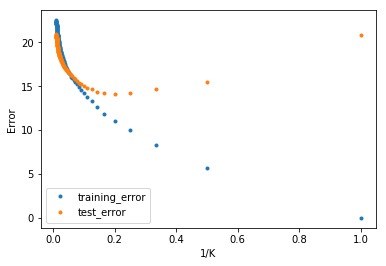

In [52]:
from sklearn import neighbors
k_list = np.arange(1,101)
def findBestK(k_list):
    training_list = []
    test_list = []
    r2 = []
    for k in k_list:
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[['AT', 'AP', 'RH', 'V']], train['PE'])
        
        pred_train = knn.predict(train[['AT', 'AP', 'RH', 'V']])
        pred_test = knn.predict(test[['AT', 'AP', 'RH', 'V']])
        r2.append(knn.score(test[['AT', 'AP', 'RH', 'V']], test['PE']))
        
        training_error = metrics.mean_squared_error(train['PE'], pred_train)
        test_error = metrics.mean_squared_error(test['PE'], pred_test)

        training_list.append(training_error)
        test_list.append(test_error)
    return training_list, test_list, r2

training_list, test_list, r2 = findBestK(k_list)
x_values = [1/x for x in k_list]
plt.plot(x_values, training_list, label = 'training_error', marker='.', linestyle='')
plt.plot(x_values, test_list, label = 'test_error', marker='.', linestyle='')
plt.legend()
plt.xlabel('1/K')
plt.ylabel('Error')
plt.show()

In [53]:
best_k = k_list[np.argmax(r2)]
print("The value of k that gives me the best fit is: " + str(best_k))

The value of k that gives me the best fit is: 5


### (j)

In [54]:
print(test_list[best_k])
print(training_list[best_k])

14.194491697627626
11.863506441939178


**Answer to (j):** 

1. Comparing the best performing KNN and the linear regression model, we see that the KNN model has a lower training error and a lower test error. 
2. KNN provides a better result because it is a non-parametric method and it is more flexible.
3. It is hader to interpret the results of KNN. In linear regression, we can calculate the coefficients of the predictors. 

## Question 3 ISLR: 2.4.1

(a) A flexible method is better. When sample size is extremly large and number of predictors is small, the samples are more likely to span the space of predictors. So a more flexible method may fit better.

(b) A flexible method is worse. Because a flexible method could easily overfit the data when $p$ is large while $n$ is small.

(c) A flexible method is better. The relationship between the predictors and response is highly non-linear, and a flexible method fits better because it provides a much wider range of possible ranges.

(d) A flexible method is worse. Because flexible method fit the errors closely, the method is worse when errors are high. So it is better to use an inflexible method.

## Question 4 ISLR 2.4.7

### (a) 

$Distance_{obs1}$= $\sqrt{(0-0)^2+(3-0)^2+(0-0)^2}=3$

$Distance_{obs2}$= $\sqrt{(2-0)^2+(0-0)^2+(0-0)^2}=2$

$Distance_{obs3}$= $\sqrt{(0-0)^2+(1-0)^2+(3-0)^2}=\sqrt{10}=3.16$

$Distance_{obs4}$= $\sqrt{(0-0)^2+(1-0)^2+(2-0)^2}=\sqrt{5}=2.24$

$Distance_{obs5}$= $\sqrt{(-1-0)^2+(0-0)^2+(1-0)^2}=\sqrt{2}=1.41$

$Distance_{obs6}$= $\sqrt{(1-0)^2+(1-0)^2+(1-0)^2}=\sqrt{3}=1.73$









### (b)

If $K=1$, then the prediction for Y is the same as the point which is closest to the test point.

From part (a), we know that obervation 5 is closest to the test point.

Hence, out prediction is 'Green', which is the same as observation 5.

### (c)

The three closest points to the test point are $obs_2$, $obs_5$ and $obs_6$.

$P(Y=Green|x=obs_{test})=\frac{1}{3} \sum I(y_i = Green) = \frac{1}{3} \times 1 = \frac{1}{3}$

$P(Y=Red|x=obs_{test})=\frac{1}{3} \sum I(y_i = Red) = \frac{1}{3} \times 2 = \frac{2}{3}$

Hence, our prediction is 'Red' since it has greater probability.

### (d)

When $K$ is smaller, the model is more flexible and is better for a non-linear decision boundary. So we expect the best value for $K$ to be small.